# Tugas Wrangling 4

* Silakan download dan kerjakan soal berikut dimanapun (laptop pribadi/google colab/etc.)
* Setelah selesai mengerjakan, upload file ini di tempat yang telah disediakan pada platform.
* Beri nama file seperti berikut: {username}-wrangling-4.ipynb
* Contoh: johndoe-ab12-wrangling-4.ipynb
* Tutorial: https://discourse.pacmann.ai/t/pengumuman-seluruh-platform-pacmann-ai/409
* Username dapat dilihat di dalam akun anda.
* Mohon jangan mengubah nama variabel yang telah diberikan.
* Namun anda diperbolehkan untuk menambah variabel apapun.
---

In [35]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import normalize

Saat ini anda bekerja sebagai pegawai magang di salah satu perusahaan jual beli mobil bekas. Perusahaan ingin membuat sebuah fitur yang dapat memprediksi  harga mobil yang dimasukkan ke dalam website berdasarkan keterangan spesifikasi mobilnya.

Atasan anda memberikan tugas kepada anda untuk melakukan proses pembersihan data yang telah dikumpulkan dari website tersebut. Untuk memudahkan pekerjaan anda diberikan petunjuk pemrosesan data yang perlu dilakukan.

data yang akan diproses disimpan di dalam folder data dengan nama file `autos.csv`

In [36]:
cars_data = pd.read_csv('data/autos.csv', encoding_errors='replace') # Inputkan kode disini

1. Lakukan observasi untuk mengecek:
    1. 10 Data teratas
    2. Statistik dari tiap kolom
    3. Tipe data dari tiap kolom
    4. Persentase nilai null

In [37]:
# Inputkan kode disini
cars_data.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_T�V_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,0,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,0,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22 00:00:00,0,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,$590,control,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16 00:00:00,0,15749,2016-04-06 10:46:35


In [38]:
# Inputkan kode disini
cars_data.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [39]:
# Inputkan kode disini
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [40]:
# Inputkan kode disini
percent_null = (cars_data.isna().sum()/len(cars_data))*100
percent_null

dateCrawled             0.000
name                    0.000
seller                  0.000
offerType               0.000
price                   0.000
abtest                  0.000
vehicleType            10.190
yearOfRegistration      0.000
gearbox                 5.360
powerPS                 0.000
model                   5.516
odometer                0.000
monthOfRegistration     0.000
fuelType                8.964
brand                   0.000
notRepairedDamage      19.658
dateCreated             0.000
nrOfPictures            0.000
postalCode              0.000
lastSeen                0.000
dtype: float64

2. ubahlah format penulisan beberapa kolom dari camelCase menjadi snake_case.
   
   `"dateCreated": "ad_created"
    "dateCrawled": "date_crawled"
    "fuelType": "fuel_type"
    "lastSeen": "last_seen"
    "monthOfRegistration": "registration_month"
    "notRepairedDamage": "unrepaired_damage"
    "nrOfPictures": "num_of_pictures"
    "offerType": "offer_type"
    "postalCode": "postal_code"
    "powerPS": "power_ps"
    "vehicleType": "vehicle_type"
    "yearOfRegistration": "registration_year"`

In [41]:
# Inputkan kode disini
cars_data.rename(columns=({
    "dateCreated": "ad_created",
    "dateCrawled": "date_crawled",
    "fuelType": "fuel_type",
    "lastSeen": "last_seen",
    "monthOfRegistration": "registration_month",
    "notRepairedDamage": "unrepaired_damage",
    "nrOfPictures": "num_of_pictures",
    "offerType": "offer_type",
    "postalCode": "postal_code",
    "powerPS": "power_ps",
    "vehicleType": "vehicle_type",
    "yearOfRegistration": "registration_year"}),inplace=True)

3. Ubah tipe data dari kolom yang berisi data tanggal sehingga bertipe data `datetime64`

In [42]:
# Inputkan kode disini
cars_data[["ad_created", "date_crawled", "last_seen"]] = cars_data[["ad_created", "date_crawled", "last_seen"]].apply(lambda x: pd.to_datetime(x))
cars_data[["ad_created", "date_crawled", "last_seen"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ad_created    50000 non-null  datetime64[ns]
 1   date_crawled  50000 non-null  datetime64[ns]
 2   last_seen     50000 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 1.1 MB


4. Dari hasil observasi pada nomor 1, terlihat format data dari kolom price dan odometer tidak sesuai dengan representasi nilainya. Amati lebih detail nilai dari kolom-kolom tersebut. Kemudian ubahlah tipe datanya menjadi int64

> Note : Anda mungkin butuh untuk menyeragamkan format penulisan nilai pada kolom tersebut sebelum di konversi

In [43]:
# Inputkan kode disini
cars_data = cars_data.assign(
    price= lambda x: x.price.replace(['(\$)','(,)'],['',''],regex=True).astype('int64'),
    odometer= lambda x: x.odometer.replace(['(km)','(,)'],['',''],regex=True).astype('int64'))

5. Dari hasil pengolahan diatas drop beberapa kolom dengan kriteria sebagai berikut:
    1. Untuk kolom yang bertipe string lakukan pengecekan jumlah data uniknya/kategorinya. Jika perbandingan jumlah tiap kategori didalam satu kolom terlalu besar, maka drop kolom tersebut. 

    Contoh: 

    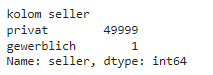

      *perbandingan jumlah kategori privat dan gewerblich pada kolom seller*

    2. Untuk kolom numeric, drop kolom yang tidak berisi informasi apapun (hanya berisi angka 0)
    3. Drop kolom yang informasinya unik disetiap baris datanya ("name") dan kolom yang memiliki banyak kategori namun tidak balance("postal_code")

In [44]:
# Inputkan kode disini
for col in cars_data.select_dtypes(include='object').columns:
    print('\nkolom', col)
    print(cars_data[col].value_counts(ascending=False))
    if cars_data[col].value_counts(ascending=False)[0]>(len(cars_data)*0.99):
        cars_data.drop(col,axis=1,inplace=True)


kolom name
Ford_Fiesta                                                 78
Volkswagen_Golf_1.4                                         75
BMW_316i                                                    75
BMW_318i                                                    72
Volkswagen_Polo                                             72
                                                            ..
peugeot_206_bj_2000rot_4tuerig_ohne_tuev_bastlerfahrzeug     1
Volvo_Volvo_S60_2.4                                          1
Sparsamer_Mitsubishi_Cold                                    1
SEAT_ALTEA_2.0_TDI__AUTOMATIK                                1
Fiat_500_C_1.2_Dualogic_Lounge                               1
Name: name, Length: 38754, dtype: int64

kolom seller
privat        49999
gewerblich        1
Name: seller, dtype: int64

kolom offer_type
Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

kolom abtest
test       25756
control    24244
Name: abtest, dtype: int64

kolom vehicle_t

In [45]:
# Inputkan kode disini
cars_data.drop([col for col in cars_data.columns if (cars_data[col]==0).all()], axis=1, inplace=True)

In [46]:
# Inputkan kode disini
cars_data.drop([col for col in cars_data.columns if (cars_data[col].dtypes!='datetime64[ns]') and (cars_data[col].nunique()>len(cars_data)*0.10)],axis=1,inplace=True)

6. Dataset yang diolah memiliki outlier pada kolom price. untuk itu kita perlu menghapus kolom outlier dari datesetnya.
   1. Lakukan eksplorasi terhadap kolom price agar anda dapat mengidentifikasi outlier tersebut
   2. Untuk memudahkan pemrosesan, ditentukan nilai dari kolom price berkisar 500 sampai 40000. Hapus data yang nilai pricenya tidak masuk dalam rentang tersebut.

In [47]:
# Inputkan kode disini
cars_data['price'].sort_values()

18089           0
43923           0
15225           0
29499           0
8445            0
           ...   
27371    12345678
47598    12345678
39377    12345678
42221    27322222
39705    99999999
Name: price, Length: 50000, dtype: int64

In [48]:
cars_data = cars_data.drop(cars_data.loc[(cars_data['price']<500)|(cars_data['price']>40000),:].index,axis=0) # Inputkan kode disini
print(cars_data['price'].sort_values())

2679       500
24823      500
16598      500
14044      500
35373      500
         ...  
28668    39999
6128     39999
41720    40000
31578    40000
13897    40000
Name: price, Length: 44752, dtype: int64


7. Dari hasil observasi pada nomor 1. Terlihat beberapa kolom memiliki nilai NaN. Lakukan imputasi terhadap data NaN, dengan ketentuan:
    1. jika kolom tersebut bertipe object maka input dengan data mode-nya
    2. jika kolom tersebut bertipe numeric input dengan nilai mediannya

In [49]:
# Inputkan kode disini
from statistics import mode
for object in cars_data.select_dtypes(include='object'):
    cars_data.fillna(mode(cars_data[object]),inplace=True) 
for num in cars_data.select_dtypes(include='int64'):
    cars_data.fillna(np.median(cars_data[num]),inplace=True)    

In [50]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44752 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date_crawled        44752 non-null  datetime64[ns]
 1   price               44752 non-null  int64         
 2   abtest              44752 non-null  object        
 3   vehicle_type        44752 non-null  object        
 4   registration_year   44752 non-null  int64         
 5   gearbox             44752 non-null  object        
 6   power_ps            44752 non-null  int64         
 7   model               44752 non-null  object        
 8   odometer            44752 non-null  int64         
 9   registration_month  44752 non-null  int64         
 10  fuel_type           44752 non-null  object        
 11  brand               44752 non-null  object        
 12  unrepaired_damage   44752 non-null  object        
 13  ad_created          44752 non-null  datetime64

8. Lakukan normalisasi terhadap semua kolom yang bertipe Numeric (kecuali kolom target *'price'*).

In [51]:
# Inputkan Kode disini
idx_col = [col for col in cars_data.select_dtypes(include='int64') if col!='price']
cars_data[idx_col]= pd.DataFrame(normalize(cars_data[idx_col])
,index=cars_data.index, columns=idx_col)
cars_data

,date_crawled,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,last_seen
0,2016-03-26 17:47:46,5000,control,bus,0.013359,manuell,0.001053,andere,0.999910,0.000020,lpg,peugeot,nein,2016-03-26,2016-04-06 06:45:54
1,2016-04-04 13:38:56,8500,control,limousine,0.013312,automatik,0.001906,7er,0.999910,0.000040,benzin,bmw,nein,2016-04-04,2016-04-06 14:45:08
2,2016-03-26 18:57:24,8990,test,limousine,0.028688,manuell,0.001457,golf,0.999587,0.000100,benzin,volkswagen,nein,2016-03-26,2016-04-06 20:15:37
3,2016-03-12 16:58:10,4350,control,kleinwagen,0.028660,automatik,0.001014,fortwo,0.999589,0.000086,benzin,smart,nein,2016-03-12,2016-03-15 03:16:28
4,2016-04-01 14:38:50,1350,test,kombi,0.013352,manuell,0.000000,focus,0.999911,0.000047,benzin,ford,nein,2016-04-01,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,24900,control,limousine,0.020106,automatik,0.002390,q5,0.999795,0.000010,diesel,audi,nein,2016-03-27,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,1980,control,cabrio,0.013305,manuell,0.000500,astra,0.999911,0.000033,benzin,opel,nein,2016-03-28,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,13200,test,cabrio,0.373597,automatik,0.012800,500,0.927500,0.002041,benzin,fiat,nein,2016-04-02,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,22900,control,kombi,0.050261,manuell,0.003745,a3,0.998729,0.000275,diesel,audi,nein,2016-03-08,2016-04-05 16:45:07


9. Lakukan encoding untuk data kategorik, sehingga bertipe numeric. Perlu diperhatikan jika kolom tersebut bertipe ordinal pastikan proses encoding memerhatikan urutan dari tiap kategori.

> Note: lakukan eksplorasi terhadap data kategorik untuk menentukan mana kolom bertipe nominal atau ordinal

In [52]:
# Inputkan Kode disini
to_label = list(cars_data.loc[:,cars_data.nunique()<=3].columns)
label_enc = preprocessing.LabelEncoder()

for col in to_label:
    cars_data[col] = label_enc.fit_transform(cars_data[col].values)

to_dummies = list(cars_data[cars_data.select_dtypes('object').columns])

for col in to_dummies:
    dum_df = pd.get_dummies(cars_data[col], columns=["Jenis"], prefix="jenis" )

# merge with main cars_data on key values
cars_data_with_dummy = cars_data.join(dum_df)
cars_data_with_dummy


,date_crawled,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,...,jenis_seat,jenis_skoda,jenis_smart,jenis_sonstige_autos,jenis_subaru,jenis_suzuki,jenis_toyota,jenis_trabant,jenis_volkswagen,jenis_volvo
0,2016-03-26 17:47:46,5000,0,bus,0.013359,1,0.001053,andere,0.999910,0.000020,...,0,0,0,0,0,0,0,0,0,0
1,2016-04-04 13:38:56,8500,0,limousine,0.013312,0,0.001906,7er,0.999910,0.000040,...,0,0,0,0,0,0,0,0,0,0
2,2016-03-26 18:57:24,8990,1,limousine,0.028688,1,0.001457,golf,0.999587,0.000100,...,0,0,0,0,0,0,0,0,1,0
3,2016-03-12 16:58:10,4350,0,kleinwagen,0.028660,0,0.001014,fortwo,0.999589,0.000086,...,0,0,1,0,0,0,0,0,0,0
4,2016-04-01 14:38:50,1350,1,kombi,0.013352,1,0.000000,focus,0.999911,0.000047,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,24900,0,limousine,0.020106,0,0.002390,q5,0.999795,0.000010,...,0,0,0,0,0,0,0,0,0,0
49996,2016-03-28 10:50:25,1980,0,cabrio,0.013305,1,0.000500,astra,0.999911,0.000033,...,0,0,0,0,0,0,0,0,0,0
49997,2016-04-02 14:44:48,13200,1,cabrio,0.373597,0,0.012800,500,0.927500,0.002041,...,0,0,0,0,0,0,0,0,0,0
49998,2016-03-08 19:25:42,22900,0,kombi,0.050261,1,0.003745,a3,0.998729,0.000275,...,0,0,0,0,0,0,0,0,0,0


10. Buatlah script pipeline pengolahan data yang telah dilakukan. Kemudian simpan kedalam sebuah repository di akun Github anda. Lampirkan link repository di bawah

In [53]:
#link repository
https://github.com/suwangsa/data_wrangling_-_used_car_price.git